In [11]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from scipy.optimize import minimize
from sklearn.base import BaseEstimator

In [54]:
def f(par1,par2,cost_mat):
    edge_cos = 0
    for i in par1:
        for j in par2:
            edge_cos += cost_mat[i][j]
    imbal_cost = 2*abs(len(par1) - len(par2))
    return edge_cos + imbal_cost

In [48]:
random.randint(0, 1)

0

In [49]:
def Accept_val(delta,temp):
    if(delta<0):
        return True
    elif(random.random() < math.exp(-delta / temp)):
        return True
    else:
        return False

In [88]:
def sim_anneal(initial_sol=None,Temp=300,cooling_rate=0.95,max_iter=1000,arr=random_graph):
    par1 = [i for i in range(int(len(arr)/2))]
    par2 = [i+par1[-1] for i in range(len(arr)-len(par1))]
    initial_sol1 = par1
    initial_sol2 = par2
    current_sol1 = initial_sol1
    current_sol2 = initial_sol2
    current_energy = f(current_sol1,current_sol2,arr)
    best_sol1 = current_sol1
    best_sol2 = current_sol2
    best_energy = current_energy
    best_store = [[best_energy,0]]
    for i in range(max_iter):
        new_sol1 = current_sol1
        new_sol2 = current_sol2
        idx_1 = random.randint(0, 1)
        if(idx_1 == 0 and len(new_sol1)>=1):
            idx_2 = random.randint(0, len(new_sol1)-1)
            move_ele = new_sol1.pop(idx_2)
            new_sol2.append(move_ele)
        if(idx_1 == 1 and len(new_sol2)>=1):
            idx_2 = random.randint(0, len(new_sol2)-1)
            move_ele = new_sol2.pop(idx_2)
            new_sol1.append(move_ele)    
        new_energy = f(new_sol1,new_sol2,arr)
        del_energy = new_energy - current_energy
        if(Accept_val(delta=del_energy,temp=Temp)):
            current_sol1 = new_sol1
            current_sol2 = new_sol2
            current_energy = new_energy
            if(current_energy<best_energy):
                best_sol1 = current_sol1
                best_sol2 = current_sol2
                print(best_sol1,best_sol2)
                best_energy = current_energy
                best_store += [[best_energy,i]]
        Temp *= cooling_rate
    
    return best_energy,best_sol,best_store

[10, 7, 13, 8, 5, 4, 2, 6] [11, 14, 3, 0, 1, 9, 7, 12]
[3, 8, 13, 6, 4, 2, 0, 5] [7, 10, 1, 12, 14, 9, 11, 7]
[6, 4, 2, 9, 1, 7, 10, 7] [12, 14, 11, 0, 5, 13, 3, 8]
[2, 11, 1, 14, 7, 7, 6, 4] [10, 12, 5, 9, 3, 0, 8, 13]
[11, 6, 7, 9, 2, 4, 10, 7] [3, 5, 0, 8, 1, 13, 12, 14]


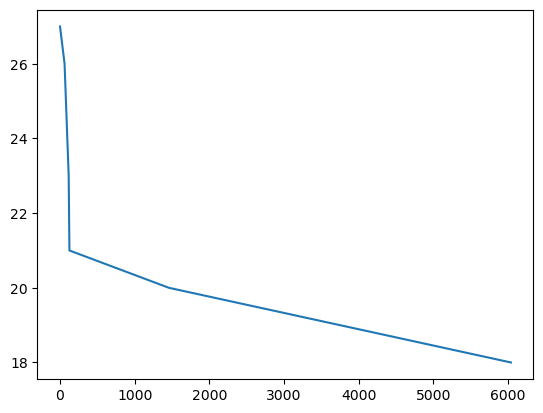

In [89]:
fun_val,best_sol,data=sim_anneal(Temp=16000,cooling_rate=0.99,max_iter=50000)
x = [row[1] for row in data]
y = [row[0] for row in data]
plt.plot(x,y)
plt.show()

In [41]:
best_sol

[3.712763679940511, 6.04939448920111]

In [44]:
abs(best_sol[0])+abs(best_sol[1])

9.762158169141621

In [30]:
val_store = []
for i in range(500):
    fun_val,_,_ = sim_anneal(Temp=300,cooling_rate=0.99,max_iter=5000)
    val_store += [fun_val] 
print(min(val_store))
print(max(val_store))
print(sum(val_store)/len(val_store))

-0.9969999999697549
-0.32456273942461183
-0.9955535491381788


In [31]:
X = [[random.uniform(-3, 3) for _ in range(2)] for _ in range(1000)]
Y = [0] * len(X)

In [32]:
param_space = {
    'Temp': Real(1e-6, 1e3, prior='log-uniform'),
    'cooling_rate': Real(0.5, 0.99),
    'max_iter': Integer(10, 1000)
}

In [85]:
import random

def generate_random_graph(num_vertices):
    # Initialize an empty adjacency matrix filled with zeros
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]

    # Populate the upper triangular part of the matrix with random values (since it's an undirected graph)
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            # Generate a random value (0 or 1) to represent the existence of an edge
            edge_exists = random.choice([0, 1])
            
            # Set the values in both symmetric positions in the matrix
            adjacency_matrix[i][j] = edge_exists
            adjacency_matrix[j][i] = edge_exists

    return adjacency_matrix

# Set the number of vertices
num_vertices = 16

# Generate a random graph adjacency matrix with 16 vertices
random_graph = generate_random_graph(num_vertices)

# Print the generated adjacency matrix
for row in random_graph:
    print(row)


[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
[1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]
[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]
